In [2]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 4.8 MB/s eta 0:00:00


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import shap
from google.colab import drive

# Mount Google Drive and Load the Dataset
drive.mount('/content/gdrive/', force_remount=True)
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/BBBOOOLLLTTT/test.csv')


Mounted at /content/gdrive/


In [6]:
# Define threshold for dropping rows/columns with missing values
threshold = 0.5 * len(df)

# Drop columns with missing values above threshold
df_cleaned = df.dropna(thresh=threshold, axis=1)

# Drop specified columns
columns_to_drop = ['device_token', 'session_token']
df_cleaned = df_cleaned.drop(columns=columns_to_drop, errors='ignore')

# Select only numeric columns
df_cleaned = df_cleaned.select_dtypes(include=[np.number])

# Replace infinite values with NaN
df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)


In [7]:
# Impute NaN values with mean imputation
imputer = SimpleImputer(strategy='mean')
df_cleaned_imputed = pd.DataFrame(imputer.fit_transform(df_cleaned), columns=df_cleaned.columns)


<Figure size 2000x2000 with 0 Axes>

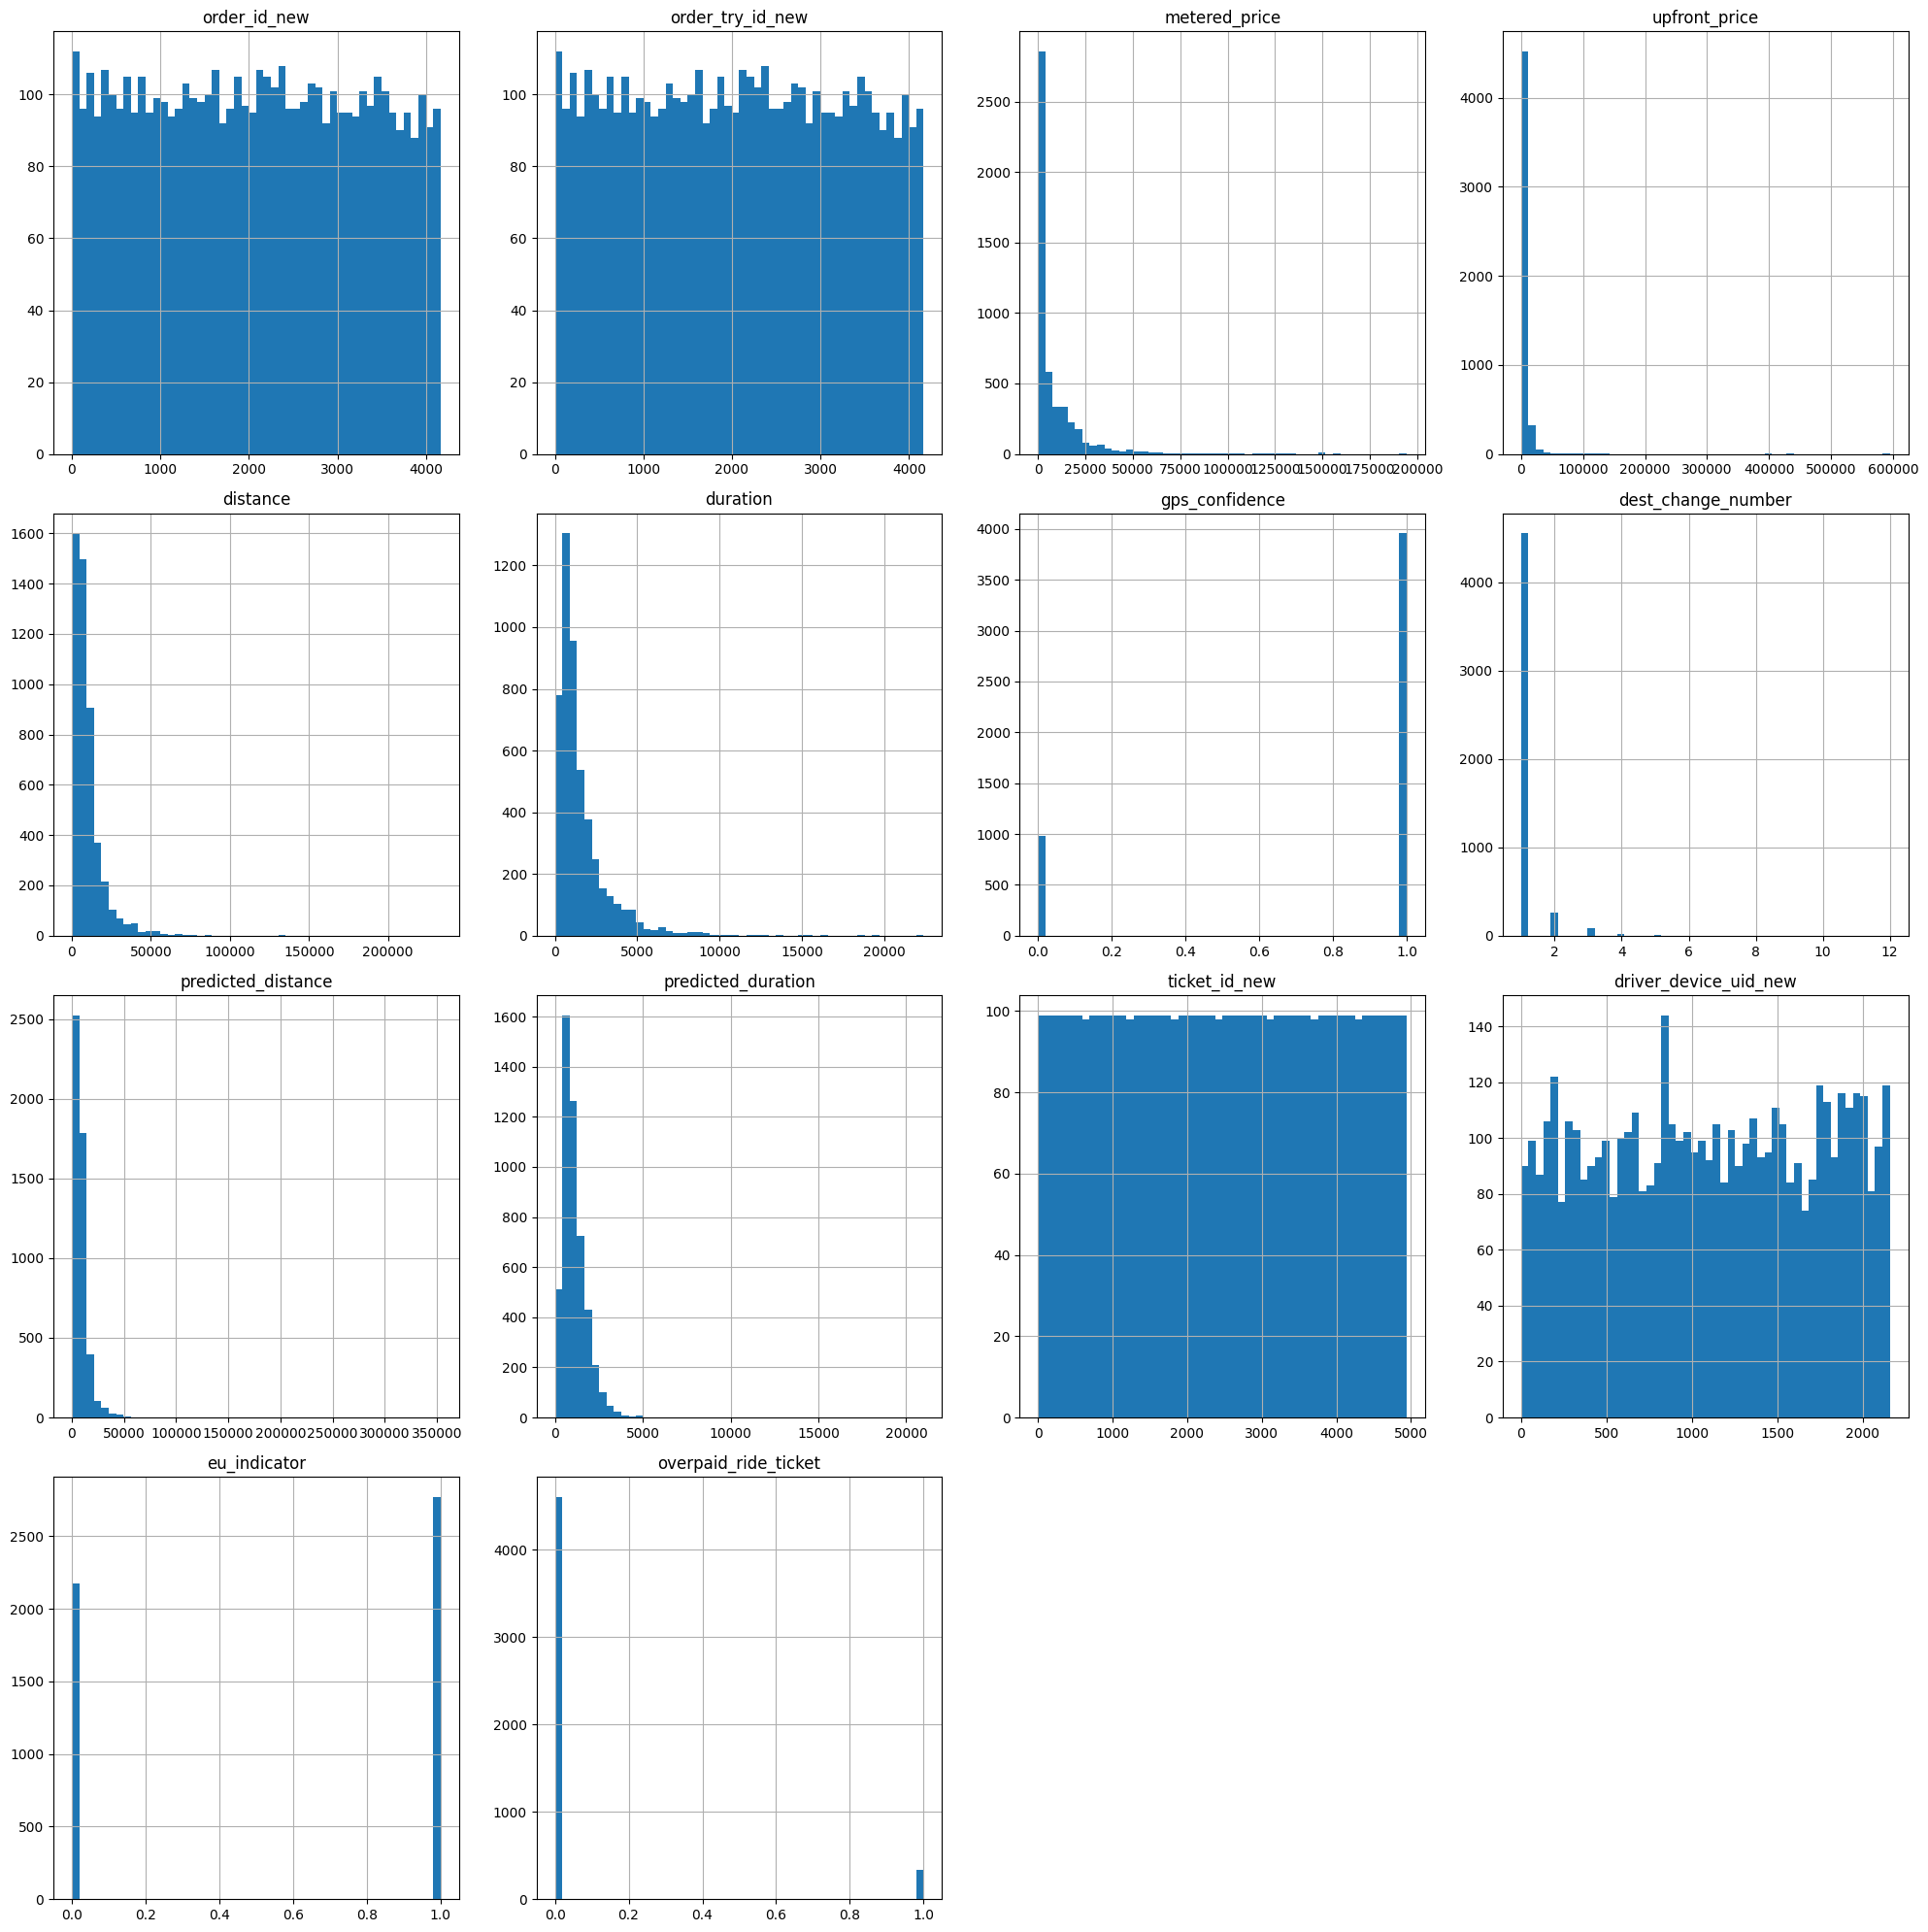

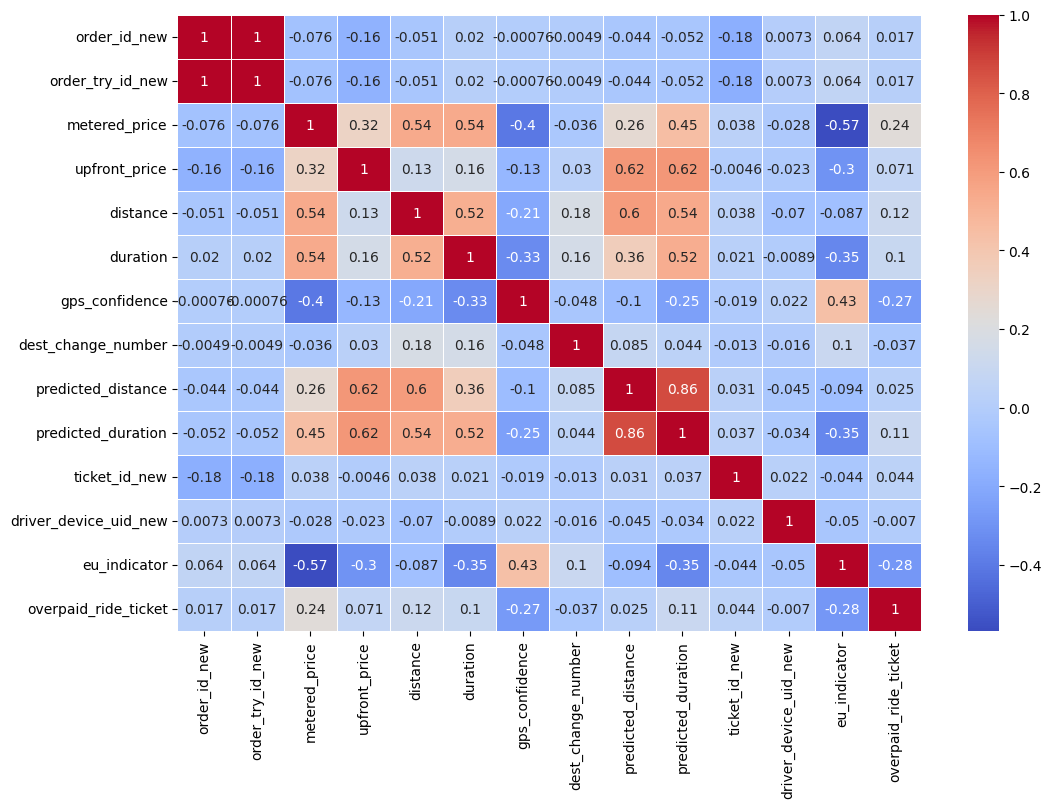

In [8]:
# Visualize histograms
plt.figure(figsize=(20, 20))
df_cleaned_imputed.hist(bins=50, figsize=(20, 20))
plt.tight_layout()
plt.show()

# Visualize correlation heatmap
corr_matrix = df_cleaned_imputed.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


In [9]:
# Selecting features and target
features = df_cleaned_imputed.columns.tolist()
features.remove('upfront_price')  # Assuming upfront_price is the target variable
X = df_cleaned_imputed[features]
y = df_cleaned_imputed['upfront_price']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluating the model
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f'MAE: {mae}')


MAE: 347.0772552044359


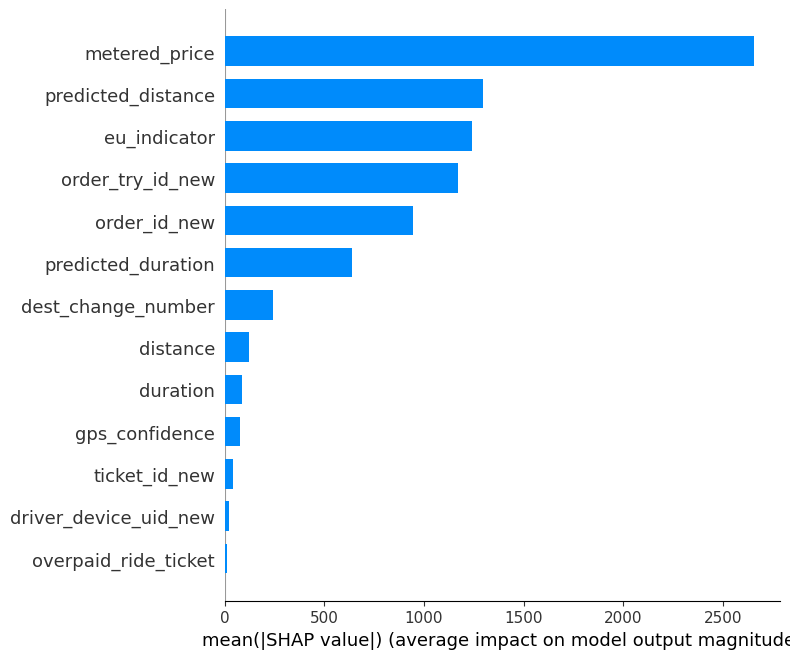

In [10]:
# Model Interpretation using SHAP
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")
